# Cell 1: Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Cell 2: Load the Dataset

In [2]:
file_path = r'C:\Users\Ahmed Ashraf\Downloads\archive\AMZN_1997-05-15_2025-02-21.csv'
amazon_data = pd.read_csv(file_path)

In [3]:
# Convert 'date' to datetime format
amazon_data['date'] = pd.to_datetime(amazon_data['date'])

C:\Users\Ahmed Ashraf\AppData\Local\Temp\ipykernel_27504\2375280532.py:2: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  amazon_data['date'] = pd.to_datetime(amazon_data['date'])


# Cell 3: Dataset Overview

In [4]:
amazon_data.info()
amazon_data.describe()
amazon_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6986 entries, 0 to 6985
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       6986 non-null   object 
 1   open       6986 non-null   float64
 2   high       6986 non-null   float64
 3   low        6986 non-null   float64
 4   close      6986 non-null   float64
 5   adj_close  6986 non-null   float64
 6   volume     6986 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 382.2+ KB


,date,open,high,low,close,adj_close,volume
0,1997-05-15 00:00:00-04:00,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000
1,1997-05-16 00:00:00-04:00,0.098438,0.098958,0.085417,0.086458,0.086458,294000000
2,1997-05-19 00:00:00-04:00,0.088021,0.088542,0.081250,0.085417,0.085417,122136000
3,1997-05-20 00:00:00-04:00,0.086458,0.087500,0.081771,0.081771,0.081771,109344000
4,1997-05-21 00:00:00-04:00,0.081771,0.082292,0.068750,0.071354,0.071354,377064000


# Cell 4: Visualization - Adjusted Closing Price Over Time

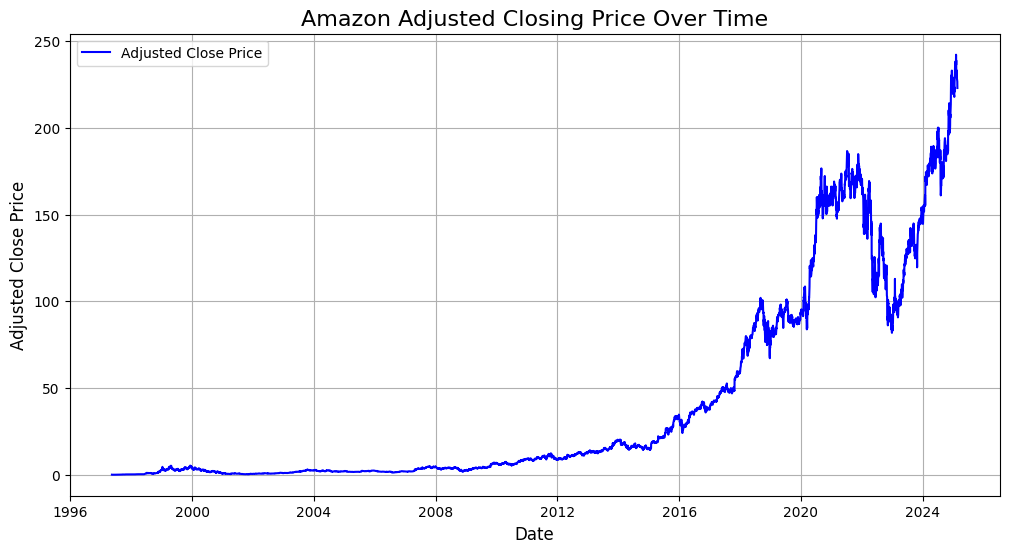

In [5]:
plt.figure(figsize=(12, 6))
plt.plot(amazon_data['date'], amazon_data['adj_close'], label='Adjusted Close Price', color='blue')
plt.title('Amazon Adjusted Closing Price Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Adjusted Close Price', fontsize=12)
plt.legend()
plt.grid()
plt.show()

# Cell 5: Visualization - Trading Volume Over Time

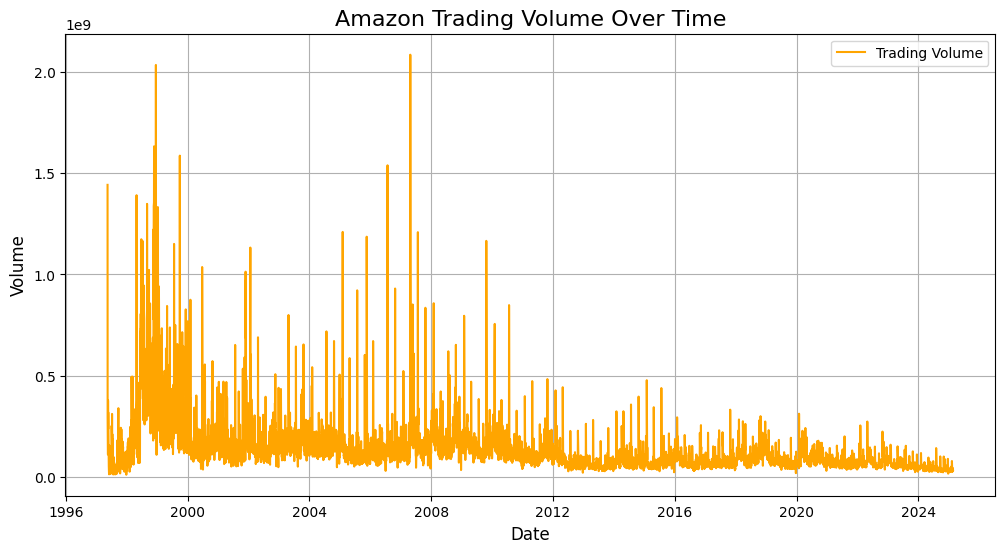

In [6]:
plt.figure(figsize=(12, 6))
plt.plot(amazon_data['date'], amazon_data['volume'], label='Trading Volume', color='orange')
plt.title('Amazon Trading Volume Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Volume', fontsize=12)
plt.legend()
plt.grid()
plt.show()

# Cell 6: Correlation Analysis

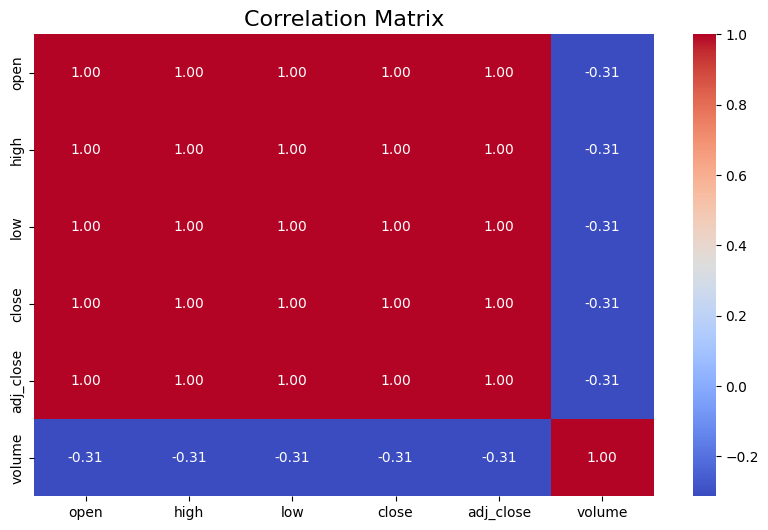

In [7]:
correlation_matrix = amazon_data[['open', 'high', 'low', 'close', 'adj_close', 'volume']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix', fontsize=16)
plt.show()

# Cell 7: Distribution of Adjusted Closing Prices

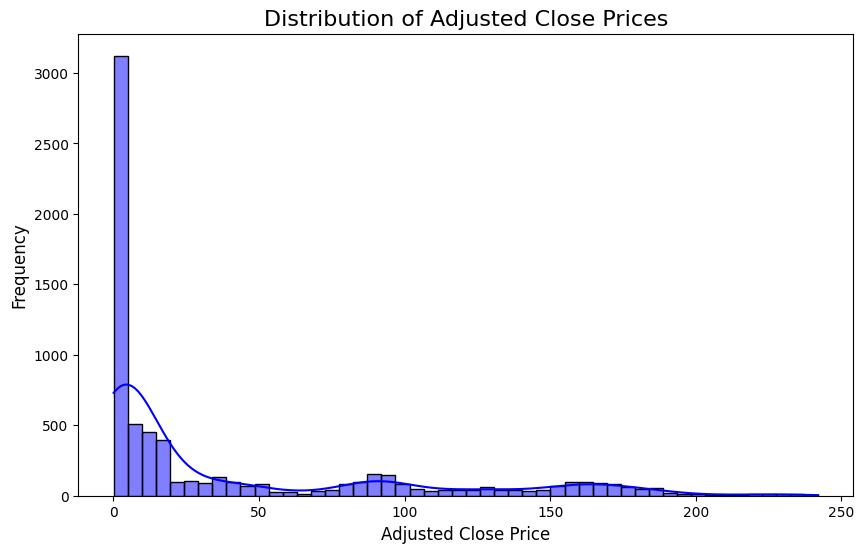

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(amazon_data['adj_close'], bins=50, kde=True, color='blue')
plt.title('Distribution of Adjusted Close Prices', fontsize=16)
plt.xlabel('Adjusted Close Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

# Cell 8: Seasonality and Trends

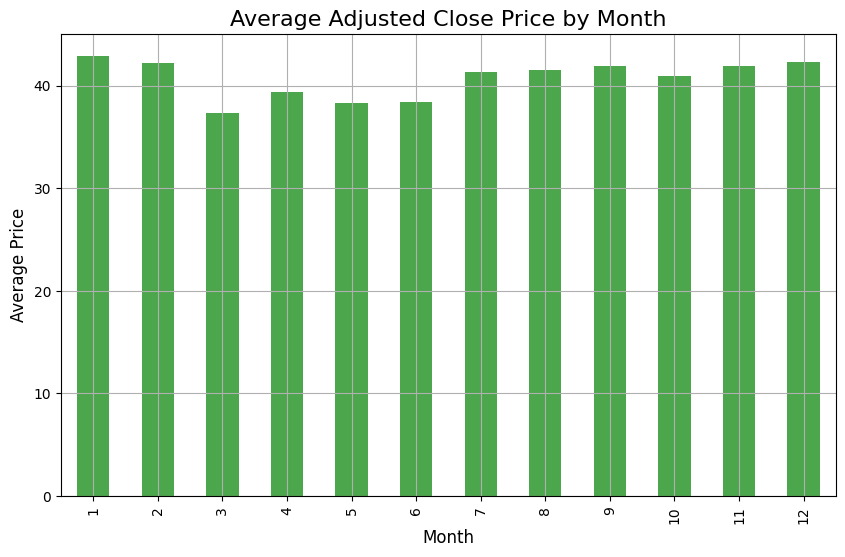

In [13]:
if not pd.api.types.is_datetime64_any_dtype(amazon_data['date']):
    amazon_data['date'] = pd.to_datetime(amazon_data['date'], utc=True)

amazon_data['year'] = amazon_data['date'].dt.year
amazon_data['month'] = amazon_data['date'].dt.month
monthly_avg = amazon_data.groupby('month')['adj_close'].mean()

plt.figure(figsize=(10, 6))
monthly_avg.plot(kind='bar', color='green', alpha=0.7)
plt.title('Average Adjusted Close Price by Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Price', fontsize=12)
plt.grid()
plt.show()

# Cell 9: Preparing Data for Machine Learning


In [14]:
features = ['open', 'high', 'low', 'volume']
target = 'adj_close'

X = amazon_data[features]
y = amazon_data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Cell 10-12: Applying Multiple Models Using a Loop


In [15]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(random_state=42),
    "Random Forest Regressor": RandomForestRegressor(random_state=42, n_estimators=100)
}

In [16]:
for name, model in models.items():
    model.fit(X_train_scaled if name == "Linear Regression" else X_train, y_train)
    y_pred = model.predict(X_test_scaled if name == "Linear Regression" else X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} - MSE: {mse:.2f}, R2 Score: {r2:.2f}")

Linear Regression - MSE: 0.25, R2 Score: 1.00
Decision Tree Regressor - MSE: 0.63, R2 Score: 1.00
Random Forest Regressor - MSE: 0.44, R2 Score: 1.00


# Cell 13: Visualization - Actual vs Predicted Prices (Random Forest)


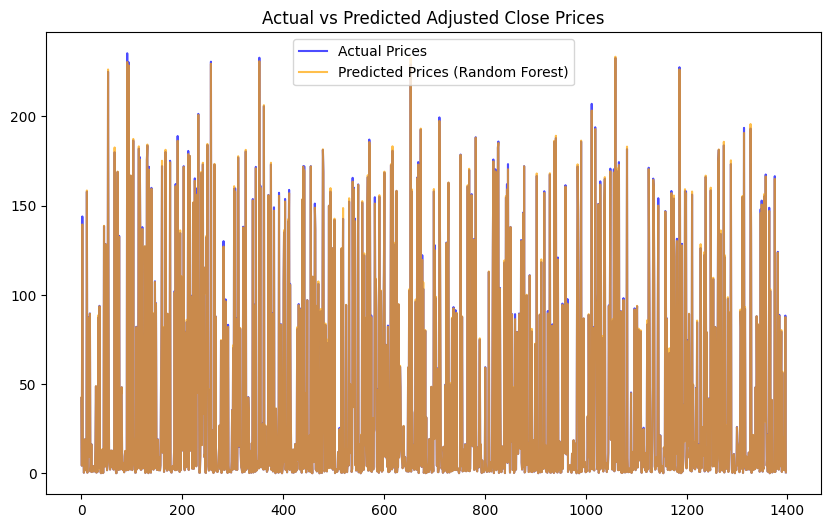

In [21]:
rf_model = models["Random Forest Regressor"]
y_pred_rf = rf_model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Prices', color='blue', alpha=0.7)
plt.plot(y_pred_rf, label='Predicted Prices (Random Forest)', color='orange', alpha=0.7)
plt.title('Actual vs Predicted Adjusted Close Prices')
plt.legend()
plt.show()